<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [2]:
import IPython
import re
import spacy
from spacy.tokenizer import Tokenizer
#map(lambda x: , dir(IPython.display))

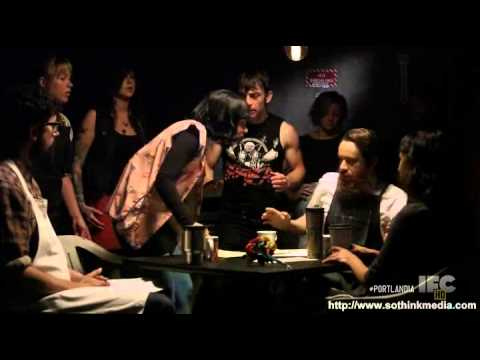

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [4]:
%pwd

'/home/me/Documents/Git/ross-fisher/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [5]:
nlp = spacy.load('en_core_web_lg')

In [6]:
tokenizer = Tokenizer(nlp.vocab)

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [8]:
shops['star_rating'] = shops['star_rating'].str.replace('star rating', '').apply(lambda x: x.strip()).astype(float)

In [10]:
shops['full_review_tokens'] = shops['full_review_text'].apply(lambda x: tokenizer(x.strip().lower()))
shops['full_review_tokens'].head()

0    (11/25/2016, 1, check-in, love, love, loved, t...
1    (12/2/2016, listed, in, date, night:, austin,,...
2    (11/30/2016, 1, check-in, listed, in, brunch, ...
3    (11/25/2016, very, cool, decor!, good, drinks,...
4    (12/3/2016, 1, check-in, they, are, located, w...
Name: full_review_tokens, dtype: object

In [11]:
shops['dates'] = shops['full_review_tokens'].apply(lambda x: x[0])
shops['full_review_tokens'] = shops['full_review_tokens'].apply(lambda x: x[1:])

In [13]:
shops[['star_rating', 'full_review_tokens']]

,star_rating,full_review_tokens
0,5.0,"(1, check-in, love, love, loved, the, atmosphe..."
1,4.0,"(listed, in, date, night:, austin,, ambiance, ..."
2,4.0,"(1, check-in, listed, in, brunch, spots, i, lo..."
3,2.0,"(very, cool, decor!, good, drinks, nice, seati..."
4,4.0,"(1, check-in, they, are, located, within, the,..."
...,...,...
7611,4.0,"(i, actually, step, into, this, restaurant, by..."
7612,5.0,"(ok,, the, steeping, room, is, awesome., how, ..."
7613,4.0,"(loved, coming, here, for, tea,, and, the, atm..."
7614,3.0,"(the, food, is, just, average., the, booths, d..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
import mynlp
from mynlp import create_wordcount_table
from importlib import reload 
reload(mynlp)

<module 'mynlp' from '/home/me/Documents/Git/ross-fisher/DS-Unit-4-Sprint-1-NLP/module1-text-data/mynlp.py'>

In [16]:
new_column = []
for tokens in shops['full_review_tokens']:
    new_tokens = []
    for token in tokens:
        if (token.is_stop==False) & (token.is_punct==False):
            new_tokens.append(token)
    new_column.append(new_tokens)

In [17]:
shops['filtered_tokens'] = new_column

In [18]:
new_col = []
for tokens in shops['filtered_tokens']:
    lemma_tokens = [word.lemma_ for word in tokens]
    new_col += [lemma_tokens]
shops['lemma_tokens'] = new_col

In [19]:
shops['lemma_tokens']

0       [1, check-in, love, love, love, atmosphere!, c...
1       [list, date, night:, austin,, ambiance, austin...
2       [1, check-in, list, brunch, spot, love, eclect...
3       [cool, decor!, good, drink, nice, seat,  , how...
4       [1, check-in, locate, northcross, mall, shop, ...
                              ...                        
7611    [actually, step, restaurant, chance, favorite,...
7612    [ok,, steep, room, awesome., great, menu, item...
7613    [love, come, tea,, atmosphere, pretty, fresh.,...
7614    [food, average., booth, didn't, feel, clean., ...
7615    [finally, stop, lunch, colleague, i'm, glad, d...
Name: lemma_tokens, Length: 7616, dtype: object

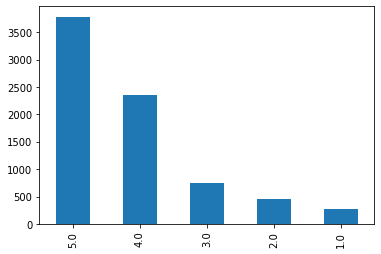

In [23]:
import matplotlib.pyplot as plt
shops['star_rating'].value_counts().plot(kind='bar')

In [24]:
import squarify
wc = create_wordcount_table(shops['lemma_tokens'])
wc.head()

,word,appears_in_count,count,rank,freq,cumfreq,appears_in_freq
6,,4343,14990,1.0,0.036868,0.036868,0.123258
15,coffee,4243,8203,2.0,0.020175,0.057043,0.120420
132,place,3257,4769,3.0,0.011729,0.068772,0.092436
137,great,2455,3274,4.0,0.008052,0.076825,0.069675
168,like,2171,3153,5.0,0.007755,0.084580,0.061615


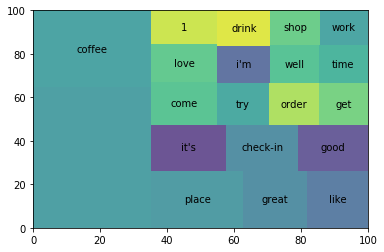

In [27]:
wc_top20 = wc[wc['rank'] <= 20.0]

squarify.plot(sizes=wc_top20['freq'], label=wc_top20['word'], alpha=0.8)
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [30]:
bad_shops = shops[shops['star_rating'] < 4]
# medium shops excluded
good_shops = shops[shops['star_rating'] > 4]

In [32]:
bad_shops_wc = create_wordcount_table(bad_shops['lemma_tokens'])
good_shops_wc = create_wordcount_table(good_shops['lemma_tokens'])

In [ ]:
shops[['filtered_tokens', 'star_rating']]

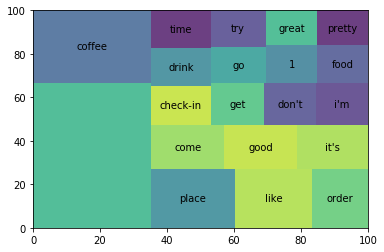

In [34]:
bad_wc_top20 = bad_shops_wc[bad_shops_wc['rank'] <= 20.0]

squarify.plot(sizes=bad_wc_top20['freq'], label=bad_wc_top20['word'], alpha=0.8)
plt.show()

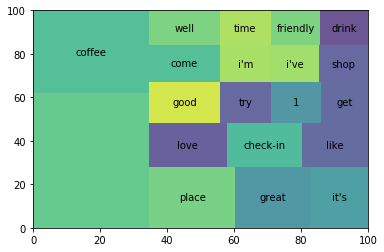

In [35]:
good_wc_top20 = good_shops_wc[good_shops_wc['rank'] <= 20.0]

squarify.plot(sizes=good_wc_top20['freq'], label=good_wc_top20['word'], alpha=0.8)
plt.show()

In [57]:
bad_shops_wc['appears_in_freq_bad'] = bad_shops_wc['appears_in_freq']

In [58]:
comparison_wc = good_shops_wc.merge(bad_shops_wc[['word', 'appears_in_freq_bad']], on='word', how='outer')
comparison_wc.head()

,word,appears_in_count,count,rank,freq,cumfreq,appears_in_freq,appears_in_freq_bad
0,,1929.0,6380.0,1.0,0.035471,0.035471,0.091726,0.067470
1,coffee,2039.0,3936.0,2.0,0.021883,0.057354,0.096957,0.060038
2,place,1510.0,2147.0,3.0,0.011937,0.069291,0.071802,0.045894
3,great,1399.0,1878.0,4.0,0.010441,0.079732,0.066524,0.019339
4,it's,955.0,1428.0,5.0,0.007939,0.087671,0.045411,0.029874


In [66]:
big_diff = (comparison_wc.appears_in_freq - comparison_wc['appears_in_freq_bad']).dropna().abs()
my_sorted = big_diff.sort_values(ascending=False)
my_sorted

3       0.047185
1       0.036919
5       0.036066
6       0.031049
2       0.025908
          ...   
5030    0.000002
5027    0.000002
5887    0.000002
6214    0.000002
645     0.000001
Length: 7198, dtype: float64

Makes sense great, love, etc. more common in positive reviews. 
Surprising coffee comes up less in negative reviews too. 

In [68]:
comparison_wc.iloc[my_sorted.index]

,word,appears_in_count,count,rank,freq,cumfreq,appears_in_freq,appears_in_freq_bad
3,great,1399.0,1878.0,4.0,0.010441,0.079732,0.066524,0.019339
1,coffee,2039.0,3936.0,2.0,0.021883,0.057354,0.096957,0.060038
5,love,1065.0,1399.0,6.0,0.007778,0.095449,0.050642,0.014576
6,check-in,1348.0,1353.0,7.0,0.007522,0.102972,0.064099,0.033050
2,place,1510.0,2147.0,3.0,0.011937,0.069291,0.071802,0.045894
...,...,...,...,...,...,...,...,...
5030,"basically,",3.0,3.0,5031.0,0.000017,0.881633,0.000143,0.000144
5027,spaces.,3.0,3.0,5028.0,0.000017,0.881583,0.000143,0.000144
5887,await,3.0,3.0,5888.0,0.000017,0.895928,0.000143,0.000144
6214,fashion,3.0,3.0,6215.0,0.000017,0.901382,0.000143,0.000144


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

